# Understanding Descriptive Statistics

Import the necessary libraries here:

In [56]:
# Libraries
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Challenge 1
#### 1.- Define a function that simulates rolling a dice 10 times. Save the information in a dataframe.
**Hint**: you can use the *choices* function from module *random* to help you with the simulation.

In [57]:
# your code here
def simulates():
    return random.choices([1,2,3,4,5,6],k=10)

dice = pd.DataFrame(simulates(), columns=['number_dice'])


#### 2.- Plot the results sorted by value.

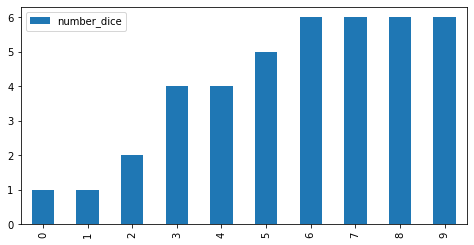

In [58]:
# your code here
dice.sort_values('number_dice', ascending=True, inplace=True, ignore_index=True)

dice.plot(kind='bar', figsize=(8, 4))


#### 3.- Calculate the frequency distribution and plot it. What is the relation between this plot and the plot above? Describe it with words.

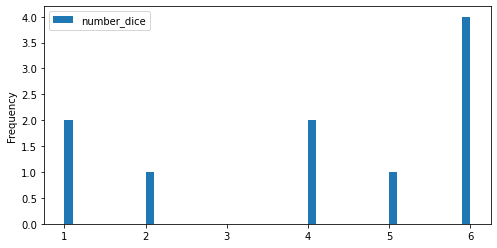

In [60]:
# your code here
dice.plot(kind='hist', figsize=(8, 4), bins=50)

In [61]:
"""
your comments here:
In the first one we see each of the rolls of the dice 
while in the second we see how many times each number of the dice has been rolled.

"""

'\nyour comments here:\nIn the first one we see each of the rolls of the dice \nwhile in the second we see how many times each number of the dice has been rolled.\n\n'

## Challenge 2
Now, using the dice results obtained in *challenge 1*, your are going to define some functions that will help you calculate the mean of your data in two different ways, the median and the four quartiles. 

#### 1.- Define a function that computes the mean by summing all the observations and dividing by the total number of observations. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [69]:
# your code here
def mean_simple(numbers):
    
    return sum([x for x in numbers])/len(numbers)


mean_simple(list(dice['number_dice']))

4.1

#### 2.- First, calculate the frequency distribution. Then, calculate the mean using the values of the frequency distribution you've just computed. You are not allowed to use any methods or functions that directly calculate the mean value. 

In [83]:
# your code here
#first we obtain the table with the frequencies 
def frequency_distribution(numbers):
    table = pd.DataFrame(set(numbers), columns=['Numbers_unique'])
    table['Frequency']=0
    
    index=0
    for number in table['Numbers_unique']:
        count=0
        for num in numbers:
            if number==num:
                count+=1
        table.loc[index,'Frequency']=count
        index+=1
    return table

#then calculate the mean using the frequencies of the table
def mean_table(dataframe):
    dataframe['Products'] = dataframe['Frequency']*dataframe['Numbers_unique']
    return sum(list(dataframe['Products']))/sum(list(dataframe['Frequency']))

#result
mean_table(frequency_distribution(list(dice['number_dice'])))

4.1

#### 3.- Define a function to calculate the median. You are not allowed to use any methods or functions that directly calculate the median value. 
**Hint**: you might need to define two computation cases depending on the number of observations used to calculate the median.

In [103]:
# your code here
#we need a list of numbers
def median_value(numbers):
    numbers.sort() #order the numbers in ascending order
    #if the total number is even, we have to take the two values in the middle and obtain the average of them
    if len(numbers)% 2 == 0:  
        value = int(len(numbers)/2)
        return (numbers[value-1] + numbers[value])/2
    
    #if it is odd, the median will be the middle value of the list
    else:
        value = int(len(numbers)/2)
        return numbers[value]
    
median_value(list(dice['number_dice']))

4.5

#### 4.- Define a function to calculate the four quartiles. You can use the function you defined above to compute the median but you are not allowed to use any methods or functions that directly calculate the quartiles. 

In [113]:
# your code here
#we need a list of numbers
def quartile_1(numbers):
    numbers.sort()  #order the numbers in ascending order
    quartile_x1 = (len(numbers)+1)/4  #quartile_1 position
    
    #if the position of the quartile is an integer, we already have the value of the quartile
    if (len(numbers)+1)% 4 == 0:
        return numbers[quartil_x1-1]
    
    #if not, you have to calculate the value of the quartile between the two values that are ahead and behind
    else:
        part_decimal = quartile_x1 - int(quartile_x1)
        return numbers[int(quartile_x1)-1] + part_decimal*(numbers[int(quartile_x1)]-numbers[int(quartile_x1)-1])

#we need a list of numbers
def quartile_3(numbers):
    numbers.sort()  #order the numbers in ascending order
    quartile_x3 = (len(numbers)+1)*3/4 #quartile_3 position
    
    
    #if the position of the quartile is an integer, we already have the value of the quartile
    if (len(numbers)+1)*3 % 4 == 0:
        return numbers[quartile_x3-1]
    
    #if not, you have to calculate the value of the quartile between the two values that are ahead and behind
    else:
        part_decimal = quartile_x3 - int(quartile_x3)
        return numbers[int(quartile_x3)-1] + part_decimal*(numbers[int(quartile_x3)]-numbers[int(quartile_x3)-1])
    
    
def quartiles(numbers):
    q1=quartile_1(numbers)
    q2=median_value(numbers)
    q3=quartile_3(numbers)
    return [q1,q2,q3]

quartiles(list(dice['number_dice']))

[1.75, 4.5, 6.0]

## Challenge 3
Read the csv `roll_the_dice_hundred.csv` from the `data` folder.
#### 1.- Sort the values and plot them. What do you see?

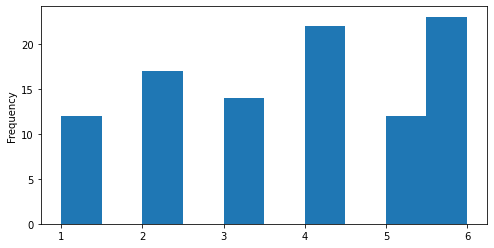

In [147]:
# your code here
dice_hundred = pd.read_csv('../data/roll_the_dice_hundred.csv',index_col=0)

dice_hundred.sort_values('value', inplace=True, ignore_index=True)

dice_hundred['value'].plot(kind='hist', figsize=(8, 4))


In [ ]:
"""
your comments here
the numbers that have been repeated the most is 6 and 4. 
the numbers that have appeared the least are 1 and 5
"""

#### 2.- Using the functions you defined in *challenge 2*, calculate the mean value of the hundred dice rolls.

In [127]:
# your code here
mean_simple(list(dice_hundred['value']))

3.74

#### 3.- Now, calculate the frequency distribution.


In [128]:
# your code here
frequency_distribution(list(dice_hundred['value']))

,Numbers_unique,Frequency
0,1,12
1,2,17
2,3,14
3,4,22
4,5,12
5,6,23


#### 4.- Plot the histogram. What do you see (shape, values...) ? How can you connect the mean value to the histogram? 

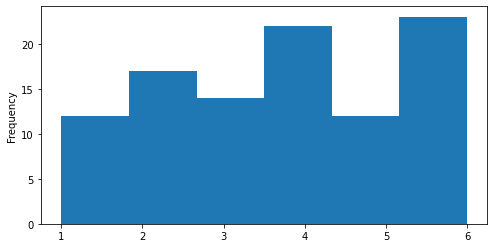

In [146]:
# your code here
dice_hundred['value'].plot(kind='hist', figsize=(8, 4), bins=6)

In [ ]:
"""
your comments here
Of the 100 rolls of the dice, higher values have been rolled more times (4,5,6), so the average is above 3.5 
(if the same number of times each number of the dice had been rolled)
"""

#### 5.- Read the `roll_the_dice_thousand.csv` from the `data` folder. Plot the frequency distribution as you did before. Has anything changed? Why do you think it changed?

In [158]:
# your code here
dice_thousand = pd.read_csv('../data/roll_the_dice_thousand.csv',index_col=0)

frequency_distribution(list(dice_thousand['value']))

,Numbers_unique,Frequency
0,1,175
1,2,167
2,3,175
3,4,168
4,5,149
5,6,166


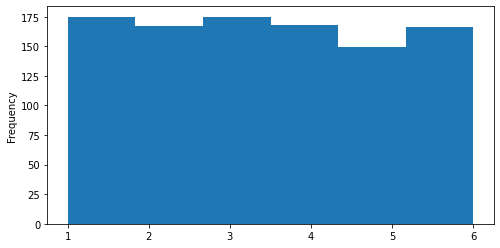

In [145]:
dice_thousand['value'].plot(kind='hist', figsize=(8, 4), bins=6)

In [ ]:
"""
your comments here:
now the number of times that each number has been rolled is more homogeneous. 
There is not much variation between the results of the die.
As there are more throws, the probability that each of the numbers on the die will roll tends to 1/6 (165 approx over 1000)
"""

## Challenge 4
In the `data` folder of this repository you will find three different files with the prefix `ages_population`. These files contain information about a poll answered by a thousand people regarding their age. Each file corresponds to the poll answers in different neighbourhoods of Barcelona.

#### 1.- Read the file `ages_population.csv`. Calculate the frequency distribution and plot it as we did during the lesson. Try to guess the range in which the mean and the standard deviation will be by looking at the plot. 

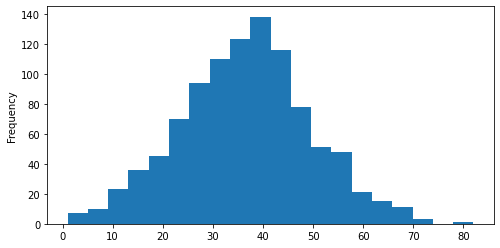

In [168]:
# your code here
ages_population = pd.read_csv('../data/ages_population.csv')

ages_population['observation'].plot(kind='hist', figsize=(8, 4), bins=20)

In [ ]:
"""
your comments here:
the approximate mean will be around 35-40. the standard deviation will be around 10-15.
"""

#### 2.- Calculate the exact mean and standard deviation and compare them with your guesses. Do they fall inside the ranges you guessed?

In [151]:
# your code here
ages_population['observation'].mean()

36.56

In [152]:
ages_population['observation'].std()

12.81649962597677

In [153]:
"""
your comments here
Yes, I thought the mean would be somewhat higher, but it is within the range as is the standard deviation.
"""

'\nyour comments here\nYes, I thought the mean would be somewhat higher, but it is within the range as is the standard deviation.\n'

#### 3.- Now read the file `ages_population2.csv` . Calculate the frequency distribution and plot it.

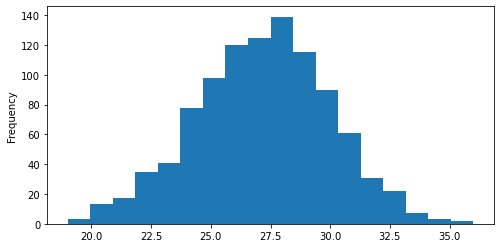

In [173]:
# your code here
ages_population_2 = pd.read_csv('../data/ages_population2.csv')

ages_population_2['observation'].plot(kind='hist', figsize=(8, 4), bins=18)

####  4.- What do you see? Is there any difference with the frequency distribution in step 1?

In [ ]:
"""
your comments here
The values in the table have less deviation, since most are between 23 and 31;will have a standard deviation around 4 
In addition, the mean age is also lower, around 28.
"""

#### 5.- Calculate the mean and standard deviation. Compare the results with the mean and standard deviation in step 2. What do you think?

In [174]:
# your code here
ages_population_2['observation'].mean()

27.155

In [175]:
ages_population_2['observation'].std()

2.9698139326891835

In [ ]:
"""
your comments here
the data are clustered in a smaller range, so the standard deviation is smaller.
"""

## Challenge 5
Now is the turn of `ages_population3.csv`.

#### 1.- Read the file `ages_population3.csv`. Calculate the frequency distribution and plot it.

In [ ]:
# your code here

#### 2.- Calculate the mean and standard deviation. Compare the results with the plot in step 1. What is happening?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 3.- Calculate the four quartiles. Use the results to explain your reasoning for question in step 2. How much of a difference is there between the median and the mean?

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### 4.- Calculate other percentiles that might be useful to give more arguments to your reasoning.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

## Bonus challenge
Compare the information about the three neighbourhoods. Prepare a report about the three of them. Remember to find out which are their similarities and their differences backing your arguments in basic statistics.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""